# Reading the data

In [1]:
import pandas as pd
df = pd.read_csv('salary_prediction_data.csv')
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


# Create Conversion Dictinaries

In [2]:
import csv

def create_conversion_dicts(csv_path='salary_prediction_data.csv'):
 """
 This function is designed to take a CSV path as input and create conversion dictionaries for each column based on its unique non-numerical values.

 Args:
     csv_path (str): The path to the CSV file.

 Returns:
     dict: A dictionary where keys are column names and values are dictionaries mapping unique non-numerical values to numerical representations (starting from 0).

 Raises:
     ValueError: If the CSV path is invalid or the file cannot be opened.
 """

 # Raise an error if the CSV path is invalid or the file cannot be opened
 try:
   with open(csv_path, 'r') as csvfile:
     reader = csv.reader(csvfile)
     headers = next(reader)  # Read the first line for column names
     data = {}
     # Read the remaining data into a dictionary
     for row in reader:
       for i, value in enumerate(row):
         if headers[i] not in data:
           data[headers[i]] = []
         data[headers[i]].append(value)
 except FileNotFoundError:
   raise ValueError("Invalid CSV path or file cannot be opened.")

 # Create a dictionary to store conversion dictionaries for each column
 conversion_dicts = {}

 # Iterate through each column in the data
 for col_name, col_values in data.items():
   value_to_num = {}
   # Check for numerical values before adding to the dictionary
   for i, val in enumerate(set(col_values)):
     try:
       float(val)  # Check if the value is numerical
     except ValueError:
       value_to_num[val] = i  # Add non-numerical values to the conversion dictionary
   conversion_dicts[col_name] = value_to_num

 return conversion_dicts

# Example usage
conversion_dicts = create_conversion_dicts()
print(conversion_dicts)

{'Education': {'Bachelor': 0, 'PhD': 1, 'High School': 2, 'Master': 3}, 'Experience': {}, 'Location': {'Rural': 0, 'Suburban': 1, 'Urban': 2}, 'Job_Title': {'Engineer': 0, 'Analyst': 1, 'Director': 2, 'Manager': 3}, 'Age': {}, 'Gender': {'Female': 0, 'Male': 1}, 'Salary': {}}


# Converting words into numbers

In [3]:
def apply_conversion_dicts(df, conversion_dicts):
 for col_name, conversion_dict in conversion_dicts.items():
   if col_name in df.columns:  # Ensure the column exists
     for index, value in enumerate(df[col_name]):
       modified_value = conversion_dict.get(str(value).strip())  # Use get() for safer access
       df.loc[index, col_name] = modified_value if modified_value is not None else value  # Handle missing keys gracefully

 return df

df = apply_conversion_dicts(df.copy(), conversion_dicts) 
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,2,8,2,3,63,1,84620.053665
1,1,11,1,2,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,2,29,0,2,45,1,96834.671282
4,1,25,2,1,26,0,132157.786175
...,...,...,...,...,...,...,...
995,2,8,1,1,25,0,64683.389864
996,2,24,2,0,30,0,74468.205020
997,3,18,0,1,44,1,98207.026024
998,0,27,1,2,31,0,108544.922720


# Splitting the Data for X and Y

In [4]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [5]:
X

,Education,Experience,Location,Job_Title,Age,Gender
0,2,8,2,3,63,1
1,1,11,1,2,59,1
2,0,28,1,3,61,0
3,2,29,0,2,45,1
4,1,25,2,1,26,0
...,...,...,...,...,...,...
995,2,8,1,1,25,0
996,2,24,2,0,30,0
997,3,18,0,1,44,1
998,0,27,1,2,31,0


In [6]:
y

0       84620.053665
1      142591.255894
2       97800.255404
3       96834.671282
4      132157.786175
           ...      
995     64683.389864
996     74468.205020
997     98207.026024
998    108544.922720
999     71077.000066
Name: Salary, Length: 1000, dtype: float64

# Splitting Data for Training and Testing.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Model.

In [8]:
from sklearn.linear_model import LinearRegression

linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

# Predicting Using the Model.

In [9]:
y_pred = linearRegressionModel.predict(X_test)

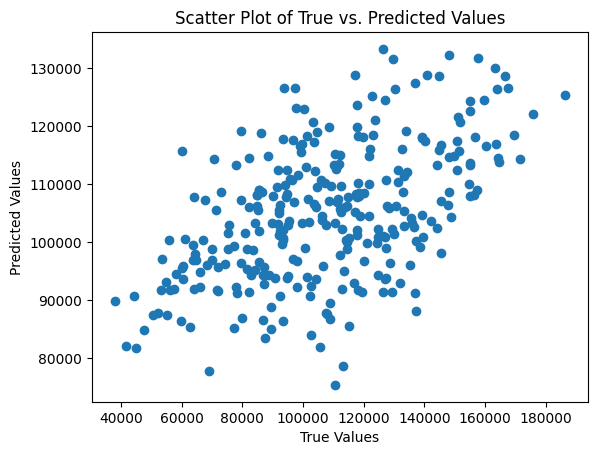

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs. Predicted Values")
plt.show()

# Decision Tree Model

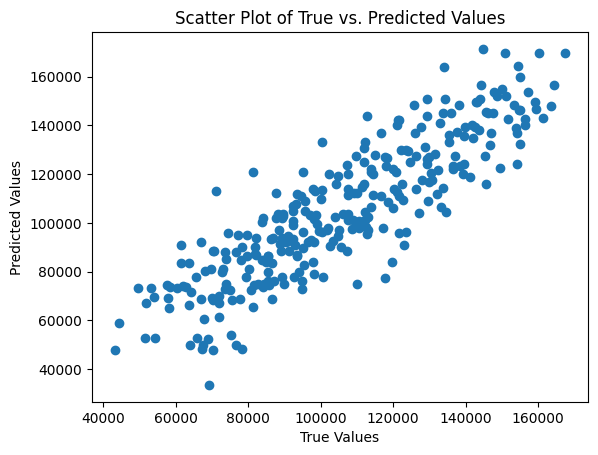

Done


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,2,8,2,3,63,1,84620.053665
1,1,11,1,2,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,2,29,0,2,45,1,96834.671282
4,1,25,2,1,26,0,132157.786175
...,...,...,...,...,...,...,...
995,2,8,1,1,25,0,64683.389864
996,2,24,2,0,30,0,74468.205020
997,3,18,0,1,44,1,98207.026024
998,0,27,1,2,31,0,108544.922720


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

def predict_with_decision_tree(data_frame, target_col):
  """
  This function trains a decision tree model to predict a target variable based on features in a CSV file.

  Args:
      csv_path (str): The path to the CSV file containing the data.
      target_col (str): The name of the column containing the target variable.

  Returns:
      tuple: A tuple containing the trained decision tree model and the mean squared error (MSE) on the test data.
  """

  # Get all columns except the target column as features
  features_cols = df.columns.tolist()
  features_cols.remove(target_col)

  # Separate features and target variable
  X = df[features_cols]
  y = df[target_col]

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # Create and train the decision tree model
  decisionTreeModel = DecisionTreeRegressor()
  decisionTreeModel.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = decisionTreeModel.predict(X_test)

  import matplotlib.pyplot as plt
  plt.scatter(y_test, y_pred)
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.title("Scatter Plot of True vs. Predicted Values")
  plt.show()
  print("Done")

  return decisionTreeModel

decisionTreeModel = predict_with_decision_tree(df, "Salary")
df

In [12]:
from sklearn.tree import DecisionTreeRegressor
decisionTreeModel = DecisionTreeRegressor()
decisionTreeModel.fit(X_train, y_train)

DecisionTreeRegressor()

# Predicting using the Decision Tree Model.

In [13]:
new_data_array = [
    [0,25,2,1,41,1],
    [3,27,1,1,31,1]
]

print(decisionTreeModel.predict(new_data_array))
print(linearRegressionModel.predict(new_data_array))


[109106.93715988 127723.00647288]
[116435.64496734 116647.01894051]


/Users/barlevi/Desktop/SalaryPrediction/myVenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/barlevi/Desktop/SalaryPrediction/myVenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# GUI Window for Getting Input from the User.

In [14]:
import tkinter as tk
import tkinter.messagebox as messagebox  # For pop-up labels
import numpy as np


def get_user_data():
  global decisionTreeModel, conversion_dicts
  """
  Retrieves the selected values from the dropdown menus and handles potential errors.
  """

  education_value = education_var.get()
  experience_value = int(experience_var.get())
  location_value = location_var.get()
  job_title_value = job_title_var.get()
  age_value = age_var.get()
  gender_value = gender_var.get()  # Get the selected value from the radio button variable

  # Replace this section with your machine learning model integration
  # This example assumes a model.predict function that takes the data as input
  # and returns a predicted salary. You'll need to replace "<your_model>"
  # with your actual model and potentially modify the data preparation for prediction.
  predicted_salary = None  # Placeholder for predicted salary (replace with actual prediction)
  # predicted_salary = model.predict([education_value, experience_value, location_value, job_title_value, age_value, gender_value])
  input_array = [
      conversion_dicts["Education"][education_value],
      experience_value,
      conversion_dicts["Location"][location_value],
      conversion_dicts["Job_Title"][job_title_value],
      age_value,
      conversion_dicts["Gender"][gender_value]
  ]
  print(input_array)
  data_for_prediction = np.array([input_array])
  data_for_prediction = np.array([data_for_prediction])


  print(data_for_prediction)
  decisionTreePredictedSalary = decisionTreeModel.predict(data_for_prediction[0])
  linearRegressionPredictedSalary = linearRegressionModel.predict(data_for_prediction[0])

  # Display pop-up message with predicted salary (if available)
  if decisionTreePredictedSalary is not None:
    message = "According to the data you provided, your predicted salary is:\n"
    message += "Decision Tree -> " + str(round(decisionTreePredictedSalary[0],2)) + "$ per year.\n"
    message += "Linear Regression -> " + str(round(linearRegressionPredictedSalary[0],2)) + "$ per year.\n"
    messagebox.showinfo("Predicted Salary", message)
  else:
    messagebox.showinfo("Prediction Unavailable", "Salary prediction is currently unavailable.")

win = tk.Tk()
win.title("User Data Input")

# Data options for dropdown menus (replace with your actual options)
education_options = ["High School", "Bachelor's Degree", "Master's Degree", "PhD"]
location_options = ["Rural", "Urban", "Suburban"]
job_title_options = ["Analyst", "Engineer", "Manager", "Director"]
age_options = [age for age in range(18, 66)]  # Create list of strings for ages 18-65
gender_options = ["Female", "Male"]

# Improved experience options (years as integers for potential calculations)
experience_options = [year for year in range(0, 30)]  # Create a list of integers from 1 to 30 for years of experience

# StringVar variables to store selected values
education_var = tk.StringVar(win)
education_var.set(education_options[0])  # Set default selection

experience_var = tk.StringVar(win)
experience_var.set(str(experience_options[0]))  # Set default selection as string

location_var = tk.StringVar(win)
location_var.set(location_options[0])

job_title_var = tk.StringVar(win)
job_title_var.set(job_title_options[0])  # Set default selection as first job title

age_var = tk.IntVar(win)
age_var.set(age_options[0])  # Set default selection as first age (18)

gender_var = tk.StringVar(win)  # Same as before for gender radio buttons
gender_var.set("Male") # Default value

# Labels for each data point
education_label = tk.Label(win, text="Education:")
education_label.pack()

education_menu = tk.OptionMenu(win, education_var, *education_options)
education_menu.pack()

experience_label = tk.Label(win, text="Experience (Years):")
experience_label.pack()

experience_menu = tk.OptionMenu(win, experience_var, *[(opt) for opt in experience_options])
experience_menu.pack()

location_label = tk.Label(win, text="Location:")
location_label.pack()

location_menu = tk.OptionMenu(win, location_var, *location_options)
location_menu.pack()

job_title_label = tk.Label(win, text="Job Title:")
job_title_label.pack()

job_title_menu = tk.OptionMenu(win, job_title_var, *job_title_options)
job_title_menu.pack()

age_label = tk.Label(win, text="Age:")
age_label.pack()

age_menu = tk.OptionMenu(win, age_var, *age_options)
age_menu.pack()

# Radio buttons for gender selection (same as before)
gender_label = tk.Label(win, text="Gender:")
gender_label.pack()

male_radio = tk.Radiobutton(win, text="Male", variable=gender_var, value="Male")
male_radio.pack()

female_radio = tk.Radiobutton(win, text="Female", variable=gender_var, value="Female")
female_radio.pack()

# Submit button to retrieve user data
submit_button = tk.Button(win, text="Submit", command=get_user_data)
submit_button.pack()

print(df)

# Get screen width and height
screen_width = win.winfo_screenwidth()
screen_height = win.winfo_screenheight()
# Get win width and height (consider potential title bar height)
window_width = 200
window_height = win.winfo_reqheight() + win.winfo_height() - win.winfo_rooty()  # Add potential title bar height
# Calculate offsets for centering
x_offset = int((screen_width - window_width) / 2)
y_offset = int((screen_height - window_height) / 2)
# Set win geometry with calculated offsets
win.geometry(f"200x350+{x_offset}+{y_offset}")

# Start the main event loop to display the GUI
win.mainloop()


    Education  Experience Location Job_Title  Age Gender         Salary
0           2           8        2         3   63      1   84620.053665
1           1          11        1         2   59      1  142591.255894
2           0          28        1         3   61      0   97800.255404
3           2          29        0         2   45      1   96834.671282
4           1          25        2         1   26      0  132157.786175
..        ...         ...      ...       ...  ...    ...            ...
995         2           8        1         1   25      0   64683.389864
996         2          24        2         0   30      0   74468.205020
997         3          18        0         1   44      1   98207.026024
998         0          27        1         2   31      0  108544.922720
999         2          25        2         2   41      0   71077.000066

[1000 rows x 7 columns]
[2, 8, 2, 3, 63, 1]
[[[ 2  8  2  3 63  1]]]


/Users/barlevi/Desktop/SalaryPrediction/myVenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/barlevi/Desktop/SalaryPrediction/myVenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
